In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ypstruct import structure
from mpl_toolkits.mplot3d import Axes3D

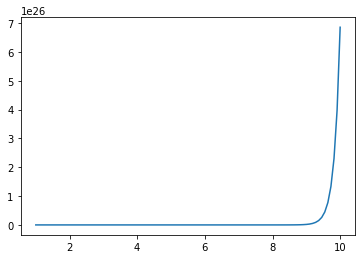

In [2]:
teta = np.linspace(1, 10, 100)
r=6*np.exp(6*teta)
plt.plot(teta, r)

In [3]:
# #sphere test function
# def sphere(x):
#     return sum(x**2)
# theta = np.radians(np.linspace(0,2*360,10000))

In [4]:
#sphere test function
def sphere(x,y):    
    s=x**2 + y**2
    return s
def Ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20


[struct({'position': array([34.87284474, -6.08277953]), 'cost': 20.397178843441555}), struct({'position': array([-55.45222157, -25.06162268]), 'cost': 21.729165469877827}), struct({'position': array([-6.81365847, -7.99066676]), 'cost': 16.187321004507485}), struct({'position': array([-65.51782672,  11.91015327]), 'cost': 21.788397490531043}), struct({'position': array([-43.42301347,  92.78608214]), 'cost': 21.999526506591806}), struct({'position': array([-55.74314315, -31.7180521 ]), 'cost': 21.83014996470688}), struct({'position': array([  2.41626354, -34.88920149]), 'cost': 21.623588466945513}), struct({'position': array([95.87001314, 11.6525029 ]), 'cost': 21.6619201557347}), struct({'position': array([-78.14771457,  58.96420348]), 'cost': 20.5212967098991}), struct({'position': array([-55.87290739,  44.47818111]), 'cost': 21.853677548265544}), struct({'position': array([  5.76932251, -46.62001009]), 'cost': 21.95430027914307}), struct({'position': array([-1.52931621, 90.3644318 ]),

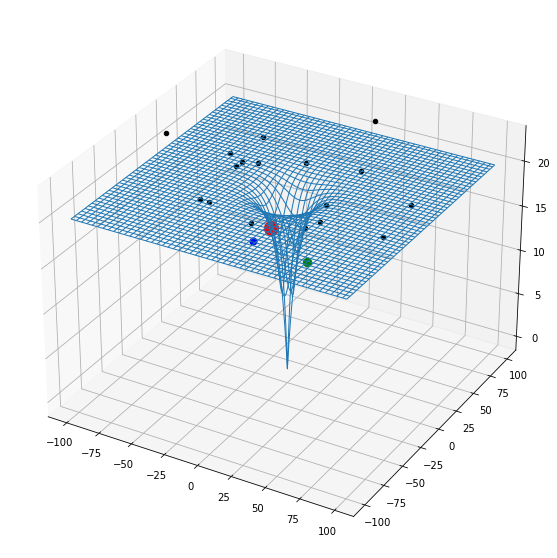

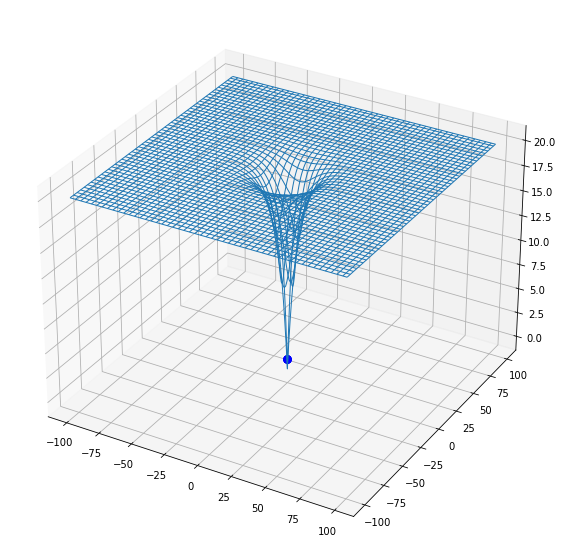

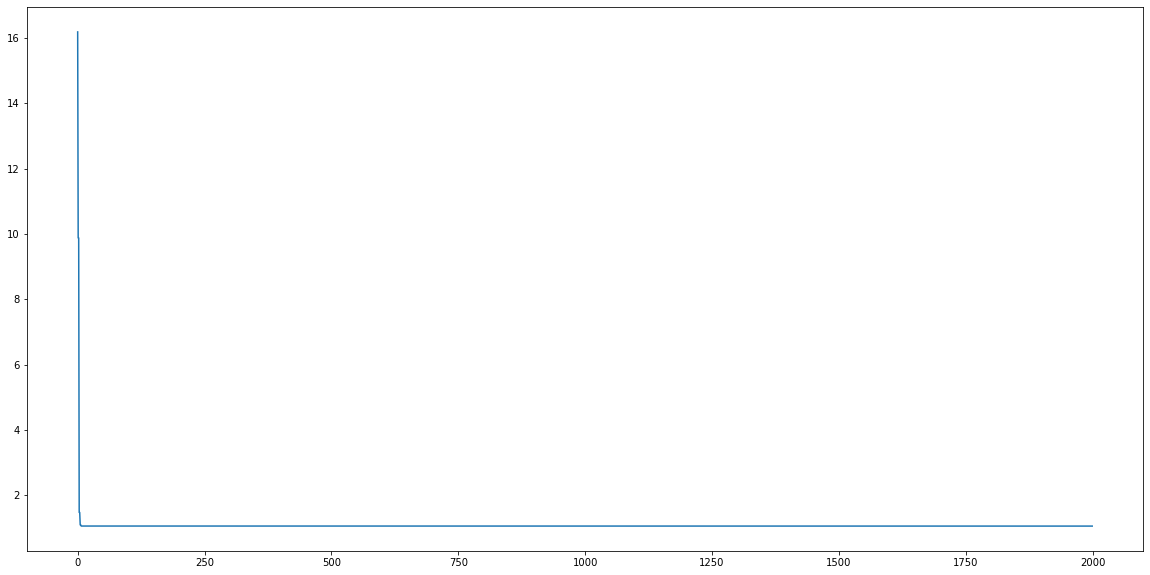

In [10]:

#Problem Defination

# costfunc= sphere
costfunc=Ackley
nvar=2        # number of decision Variable
varmin=-100     #فضای جست و جو
varmax=100

#GWO Parameters
maxit=2000  #number of maximo  itiriation
npop=20    #تعداد جمعیت دسته

    
#EmpteIndividual Template
empty_indevidual= structure()
empty_indevidual.position=None
# empty_indevidual.cost=float('inf')
empty_indevidual.cost=100000
    
#Initialze population
pop=empty_indevidual.repeat(npop)
    
Alpha = empty_indevidual.deepcopy()
Beta = empty_indevidual.deepcopy()
Delta = empty_indevidual.deepcopy()

#plot 

fig=plt.figure(figsize=(20,10))
fig.clf()
ax = plt.axes(projection="3d")
x= np.arange(varmin,varmax,1)
y=np.arange(varmin,varmax,1)
x,y=np.meshgrid(x,y)
# r=costfunc(np.stack((x,y),axis=0))
r=costfunc(x, y)
surf=ax.plot_wireframe(x,y,r ,linewidth=1)

#توزیع گرگ ها به طور اتفاقی
for i in range(npop):
    pop[i].position=np.random.uniform(varmin,varmax, nvar)
#     pop[i].cost=costfunc(pop[i].position)
    pop[i].cost= costfunc(pop[i].position[0],pop[i].position[1])  
    #plot 
    ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,c='k', s=20)

    #update Alpha Beta , Dtlta 1
    if pop[i].cost <Alpha.cost :
        Alpha=pop[i].deepcopy()
    elif pop[i].cost <Beta.cost :
        Beta=pop[i].deepcopy()
    elif pop[i].cost <Delta.cost :
        Delta=pop[i].deepcopy()
#نمایش گرگ های آلفا و بتا و دلتا روی  فضای جست و جو
ax.scatter(Alpha.position[1],Alpha.position[0], Alpha.cost,c='r', s=200)
ax.scatter(Beta.position[1],Beta.position[0], Beta.cost,zdir='z',c='g', s=70)
ax.scatter(Delta.position[1],Delta.position[0], Delta.cost,zdir='z',c='b', s=50)
print(pop)


#main

NFE = 0
BestCost = np.zeros([maxit])
for it in range(maxit):
    a = 2- it*(2/maxit)

    for i in range(npop):
        r1=np.random.rand(1, nvar)
        r2=np.random.rand(1,nvar)
        A=2*a*r1-a
        C=2*r2
        D=abs(C.dot(Alpha.position)-pop[i].position)
        X1=Alpha.position-A.dot(D)

        r1=np.random.rand(1, nvar)
        r2=np.random.rand(1,nvar)
        A=2*a*r1-a
        C=2*r2
        D=abs(C.dot(Beta.position)-pop[i].position)
        X2=Beta.position-A.dot(D)

        r1=np.random.rand(1, nvar)
        r2=np.random.rand(1,nvar)
        A=2*a*r1-a
        C=2*r2
        D=abs(C.dot(Delta.position)-pop[i].position)
        X3=Delta.position-A.dot(D)

        pop[i].position=(X1+X2+X3)/3
        pop[i].position[pop[i].position > varmax] = varmax
        pop[i].position[pop[i].position < varmin] = varmin

        #به روز رسانی کاست هر گرگ بر اساس موقعیت جدیدش
#         pop[i].cost=costfunc(pop[i].position)
        pop[i].cost= costfunc(pop[i].position[0],pop[i].position[1])

        #update Alpha Beta , Dtlta 2
        if pop[i].cost <Alpha.cost :
            Alpha=pop[i].deepcopy()
        elif pop[i].cost <Beta.cost :
            Beta=pop[i].deepcopy()
        elif pop[i].cost <Delta.cost :
            Delta=pop[i].deepcopy()
    NFE+=npop
    BestCost[it]=Alpha.cost
    #print('Itration= ', it , '  | NFE =' , NFE , '| BestCost= ',BestCost[it])
    
#نمایش موقعیت گرگ ها بعد از اجرای الگوریتم

fig1=plt.figure(figsize=(20,10))
fig1.clf()
ax = plt.axes(projection="3d")
x= np.arange(varmin,varmax,1)
y=np.arange(varmin,varmax,1)
x,y=np.meshgrid(x,y)
# r=costfunc(np.stack((x,y),axis=0))
r=costfunc(x, y)
surf=ax.plot_wireframe(x,y,r ,linewidth=1)
for i in range(npop):
    ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,zdir='z',c='b', s=50)

#نمایش نمودار تغییرات کمترین کاست در هر تکرار حلقه
fig2=plt.figure(figsize=(20,10))
fig2.clf()
plt.plot(BestCost)    





In [23]:

print(pop)

[struct({'position': array([-1.07003679,  1.06972744]), 'cost': 2.2892955356865548}), struct({'position': array([-1.07027597,  1.06948826]), 'cost': 2.2892957945081758}), struct({'position': array([-1.07020052,  1.06956371]), 'cost': 2.289295687027673}), struct({'position': array([-1.06985511,  1.06990913]), 'cost': 2.2892954857213574}), struct({'position': array([-1.06825152,  1.07151271]), 'cost': 2.2893007985573934}), struct({'position': array([-1.07327533,  1.0664889 ]), 'cost': 2.2893185086242442}), struct({'position': array([-1.06712758,  1.07263665]), 'cost': 2.2893106558253615}), struct({'position': array([-1.06618938,  1.07357485]), 'cost': 2.2893227534821725}), struct({'position': array([-1.07288724,  1.06687699]), 'cost': 2.2893135423974034}), struct({'position': array([-1.07136426,  1.06839997]), 'cost': 2.28929987436275}), struct({'position': array([-1.07274394,  1.06702029]), 'cost': 2.2893118609852126}), struct({'position': array([-1.06704478,  1.07271945]), 'cost': 2.28

In [22]:
# fig=plt.figure(figsize=(10,10))
# ax = plt.axes(projection="3d")
# x= np.arange(problem.varmin,problem.varmax,1)
# y=np.arange(problem.varmin,problem.varmax,1)
# x,y=np.meshgrid(x,y)

# r=sphere(np.stack((x,y),axis=0))


# surf=ax.plot_wireframe(x,y,r ,linewidth=1)
# ax.scatter(10,20, 2000,zdir='z',c='red', s=200)


In [ ]:
x= np.arange(-5,5,1)
y=np.arange(-5,5,1)
print(x)
print('-----')
print(y)
print('---------')
z= np.stack((x,y),axis=0)
print(z)
sphere(z)

In [ ]:
    for i in range(10):
        pop[i].position=np.random.uniform(-5,5, 2)
        pop[i].cost=costfunc(pop[i].position)